In [5]:
import numpy as np
time_data_split1 = np.load('sudoku/Results/experiment_results_time_split1.npy')
propagation_data_split1 = np.load('sudoku/Results/experiment_results_propagations_split1.npy')
split_data_split1 = np.load('sudoku/Results/experiment_results_splits_split1.npy')
time_data_split2 = np.load('sudoku/Results/experiment_results_time_split2.npy')
propagation_data_split2 = np.load('sudoku/Results/experiment_results_propagations_split2.npy')
split_data_split2 = np.load('sudoku/Results/experiment_results_splits_split2.npy')
%pylab inline
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *
rcParams['legend.loc'] = 'best'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


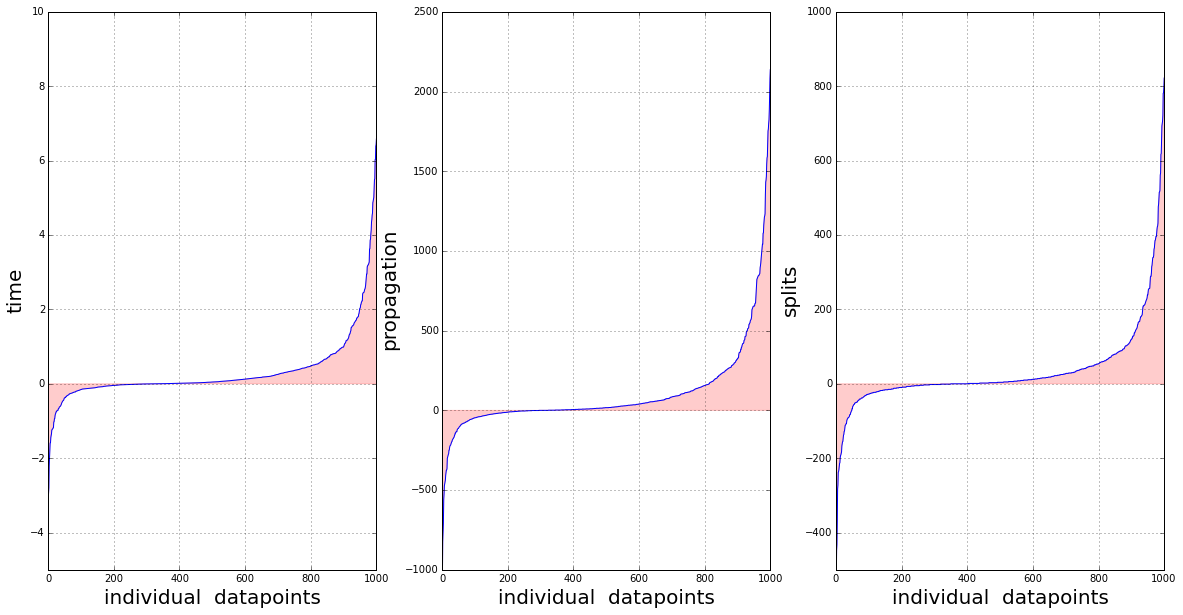

18.0452921391
0.00182008743286
5445
1
2288
0


In [15]:
difference_time = time_data_split1 - time_data_split2
difference_propgation = propagation_data_split1 - propagation_data_split2
difference_split = split_data_split1 - split_data_split2


difference_time.sort()
difference_propgation.sort()
difference_split.sort()

zero = np.zeros(len(difference_time))

fig = figure(figsize=(20, 10))
fig.set_label('Difference between sudoku')
a = plt.subplot(131)
#a.gca().set_xlim(right=5)
grid(True)
a.plot(difference_time)
a.fill_between(range(len(difference_time)), zero, difference_time, alpha = 0.2, color = "r")
#a.xlim([0,1500])
a.set_xlim([0, 1000])
a.set_ylim([-5, 10])
a.set_ylabel('time', fontsize=20)
a.set_xlabel('individual  datapoints', fontsize=20)
#a.xlabel('Number of sudoku')

b = plt.subplot(132)
#a.gca().set_xlim(right=5)
grid(True)
b.plot(difference_propgation)
b.fill_between(range(len(difference_propgation)), zero, difference_propgation, alpha = 0.2, color = "r")
#a.xlim([0,1500])
b.set_xlim([0, 1000])
b.set_ylim([-1000, 2500])
b.set_ylabel('propagation', fontsize=20)
b.set_xlabel('individual  datapoints', fontsize=20)
fig.set_label('Difference between sudoku')
#a.xlabel('Number of sudoku')

c = plt.subplot(133)
#a.gca().set_xlim(right=5)
grid(True)
c.plot(difference_split)
c.fill_between(range(len(difference_split)), zero, difference_split, alpha = 0.2, color = "r")
#a.xlim([0,1500])
c.set_xlim([0, 1000])
c.set_ylim([-500, 1000])
c.set_ylabel('splits', fontsize=20)
c.set_xlabel('individual  datapoints', fontsize=20)
#a.xlabel('Number of sudoku')

with PdfPages('Model_Of_Comparison_single_data.pdf') as pdf:
    pdf.savefig(fig)
    plt.show()


print np.amax(time_data_split1)
print np.amin(time_data_split2)
print np.amax(propagation_data_split1)
print np.amin(propagation_data_split2)
print np.amax(split_data_split1)
print np.amin(split_data_split2)

In [4]:
X = np.arange(0, 9)

visits_mean = [Data[Data[:,Columns.index('difficult_level')] == x][:, Columns.index('visits_number')].mean() for x in X]
fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(X, visits_mean, 'r', label='Mean')

visits_variance = [np.var(Data[Data[:,Columns.index('difficult_level')] == x][:,Columns.index('visits_number')]) for x in X]
ax.plot(X, visits_variance, 'b', label='Variance')
ax.set_yscale('log')
legend()
xlabel('Difficulty level')
grid(True)

with PdfPages('mean_variance.pdf') as pdf:
    pdf.savefig(fig)
    plt.show()

NameError: name 'Data' is not defined

In [5]:
from scipy import stats

for i in range(7):
    d1 = Data[Data[:,Columns.index('difficult_level')] == i][:, Columns.index('visits_number')]
    d2 = Data[Data[:,Columns.index('difficult_level')] == i + 1][:, Columns.index('visits_number')]
    t, p = stats.ttest_ind(d1, d2, equal_var=False)
    print(p)

NameError: name 'Data' is not defined

0.740930072396
0.326124316743


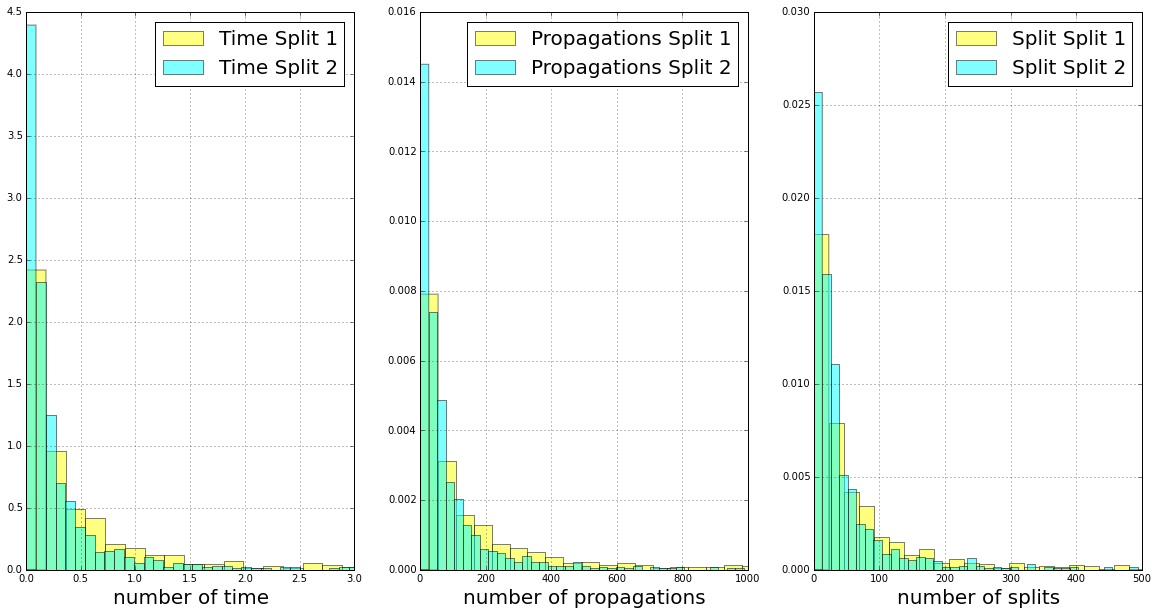

In [10]:
print mean(time_data_split1)
print mean(time_data_split2)



# Visits
num_bins = 100

colors = ['green', 'red', 'blue', 'yellow', 'pink', 'orange', 'cyan', 'magenta']

i = 3
fig = figure(figsize=(20, 10))

a = plt.subplot(131)
#a.gca().set_xlim(right=5)
grid(True)
n, bins, patches = hist(time_data_split1, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label = "Time Split 1" )
i = 6
n, bins, patches = hist(time_data_split2, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label = "Time Split 2")
#a.xlim([0,1500])
a.set_xlim([0, 3])
a.legend(fontsize=20)
a.set_xlabel('number of time', fontsize=20)
#a.xlabel('Number of sudoku')

b = plt.subplot(132)
#plt.gca().set_xlim(right=1500)
grid(True)
i = 3
n, bins, patches = hist(propagation_data_split1, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label = "Propagations Split 1")
i = 6
n, bins, patches = hist(propagation_data_split2, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label = "Propagations Split 2")
b.legend(fontsize=20)
b.set_xlim([0, 1000])
b.set_xlabel('number of propagations', fontsize=20)
#b.xlabel('Number of sudoku')


c = plt.subplot(133)
#plt.gca().set_xlim(right=1500)
grid(True)
i = 3
n, bins, patches = hist(split_data_split1, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label = "Split Split 1")
i = 6
n, bins, patches = hist(split_data_split2, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label = "Split Split 2")
c.legend(fontsize=20)
c.set_xlim([0, 500])
c.set_xlabel('number of splits', fontsize=20)
#b.xlabel('Number of sudoku')

with PdfPages('Model_Of_Comparison_bins.pdf') as pdf:
    pdf.savefig(fig)
    plt.show()


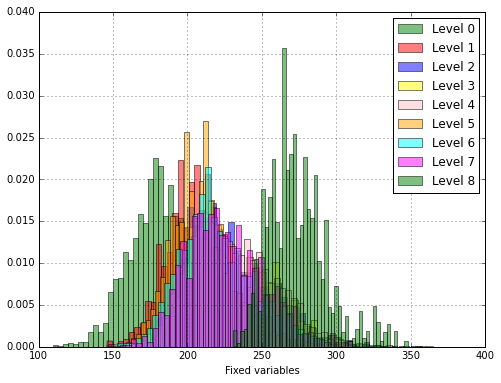

In [17]:
# Fixed variables
fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(0, 9):
    x = Data[Data[:,0] == i][:,3]
    n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))

legend()
xlabel('Fixed variables')
grid(True)

with PdfPages('fixed_variables.pdf') as pdf:
    pdf.savefig(fig)
    show()

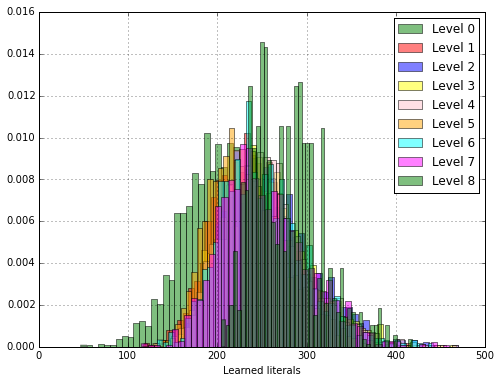

In [18]:
# Learned literals
fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(9):
    x = Data[Data[:,0] == i][:,4]
    n, bins, patches = hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))

legend()
xlabel('Learned literals')
grid(True)

with PdfPages('learned_literals.pdf') as pdf:
    pdf.savefig(fig)
    plt.show()

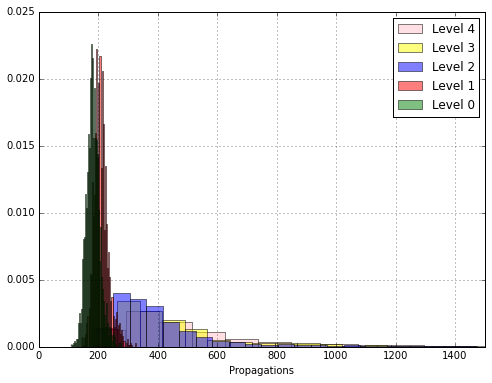

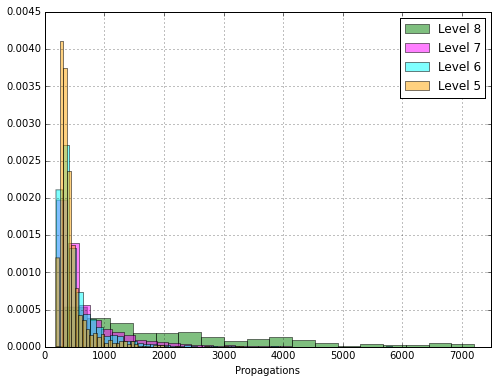

In [19]:
# Propogations
fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(4, -1, -1):
    x = Data[Data[:,0] == i][:,6]
    n, bins, patches = hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))

legend()
xlim([0,1500])
xlabel('Propagations')
grid(True)
with PdfPages('propagations_0_4.pdf') as pdf:
    pdf.savefig(fig)
    show()

fig = figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for i in range(8, 4, -1):
    x = Data[Data[:,0] == i][:,6]
    n, bins, patches = hist(x, num_bins, normed=1, facecolor=colors[i%len(colors)], alpha=0.5, label='Level ' + str(i))


legend()
xlim([0,7500])
xlabel('Propagations')
grid(True)

with PdfPages('propagations_5_8.pdf') as pdf:
    pdf.savefig(fig)
    show()